In [1]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
measurements = []

with open('average-delays.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',', quotechar=',')
    for row in csv_reader:
        scenario = row[0].split("_")[0]
        if scenario == "bad" or scenario == "good":
            db = row[0].split("_")[1]
            stdev = float(row[0].split("_")[4][:-4])
            if scenario == "bad" or scenario == "good":
                meas = {"scenario": scenario, "db": db, "stdev": stdev, "abdb_read_mean": row[1],
                        "abdb_read_std": row[2], "abdb_write_mean": row[3], "abdb_write_std": row[4],
                        "redis_read_mean": row[5], "redis_read_std": row[6],
                        "redis_write_mean": row[7], "redis_write_std": row[8]}
                measurements.append(meas)

measurements_sorted = sorted(measurements, key=lambda d: d['stdev'])
print(measurements_sorted)

[{'scenario': 'bad', 'db': 'redis', 'stdev': 0.5773502691896257, 'abdb_read_mean': '4.499763622006906', 'abdb_read_std': '3.220177345328306', 'abdb_write_mean': '5.070818753597058', 'abdb_write_std': '3.2572353737078337', 'redis_read_mean': '5.346903911971354', 'redis_read_std': '3.336545888531111', 'redis_write_mean': '5.350701831648348', 'redis_write_std': '3.314294746788595'}, {'scenario': 'good', 'db': 'redis', 'stdev': 0.5773502691896257, 'abdb_read_mean': '4.724599529007227', 'abdb_read_std': '3.809555576617918', 'abdb_write_mean': '5.270741618312496', 'abdb_write_std': '3.7698245764212257', 'redis_read_mean': '5.07903429141079', 'redis_read_std': '4.093699895143607', 'redis_write_mean': '5.05250677492502', 'redis_write_std': '3.9433953518105334'}, {'scenario': 'bad', 'db': 'redis', 'stdev': 1.1547005383792515, 'abdb_read_mean': '4.052574633243518', 'abdb_read_std': '2.98833891289735', 'abdb_write_mean': '4.6076754126875015', 'abdb_write_std': '2.915280714791265', 'redis_read_mea

## ABDB vs Redis mean reading in the "good Redis" scenario

In [62]:
df = pd.DataFrame({})

# this should be read or write
required_operation = "write"
# this should be good or bad
required_scenario = "good"

In [63]:
for measurement in measurements_sorted:
    if measurement["scenario"] == required_scenario:
        if measurement["stdev"] < 1.0:
            distribution = "0-1"
        elif measurement["stdev"] < 2.0 and measurement["stdev"] >= 1.0:
            distribution = "1-2"
        elif measurement["stdev"] < 3.0 and measurement["stdev"] >= 2.0:
            distribution = "2-3"
        elif measurement["stdev"] < 4.0 and measurement["stdev"] >= 3.0:
            distribution = "3-4"
        elif measurement["stdev"] < 5.0 and measurement["stdev"] >= 4.0:
            distribution = "4-5"
        elif measurement["stdev"] < 6.0 and measurement["stdev"] >= 5.0:
            distribution = "5-6"
        elif measurement["stdev"] < 7.0 and measurement["stdev"] >= 6.0:
            distribution = "6-7"
        elif measurement["stdev"] < 8.0 and measurement["stdev"] >= 7.0:
            distribution = "7-8"
        elif measurement["stdev"] < 9.0 and measurement["stdev"] >= 8.0:
            distribution = "8-9"
        elif measurement["stdev"] < 10.0 and measurement["stdev"] >= 9.0:
            distribution = "9-10"
        else:
            asd = 0
        
        if required_operation == "read":
            df = df.append(
                {'dist': distribution, 'operation': required_operation, 'latency': measurement["abdb_read_mean"],
                 'db': "abdb"}, ignore_index=True)
            df = df.append(
                {'dist': distribution, 'operation': required_operation, 'latency': measurement["redis_read_mean"],
                 'db': "redis"}, ignore_index=True)
        
        if required_operation == "write":
            print(measurement)
            df = df.append(
                {'dist': distribution, 'operation': required_operation, 'latency': measurement["abdb_write_mean"],
                 'db': "abdb"}, ignore_index=True)
            df = df.append(
                {'dist': distribution, 'operation': required_operation, 'latency': measurement["redis_write_mean"],
                 'db': "redis"}, ignore_index=True)


df['latency'] = df['latency'].astype('float')

{'scenario': 'good', 'db': 'redis', 'stdev': 0.5773502691896257, 'abdb_read_mean': '4.724599529007227', 'abdb_read_std': '3.809555576617918', 'abdb_write_mean': '5.270741618312496', 'abdb_write_std': '3.7698245764212257', 'redis_read_mean': '5.07903429141079', 'redis_read_std': '4.093699895143607', 'redis_write_mean': '5.05250677492502', 'redis_write_std': '3.9433953518105334'}
{'scenario': 'good', 'db': 'redis', 'stdev': 1.1547005383792515, 'abdb_read_mean': '5.072605384349167', 'abdb_read_std': '3.715834131702981', 'abdb_write_mean': '5.6326068745733195', 'abdb_write_std': '3.661762988242867', 'redis_read_mean': '4.629061821050373', 'redis_read_std': '3.5004682527845237', 'redis_write_mean': '4.648415135175559', 'redis_write_std': '3.5155408628769327'}
{'scenario': 'good', 'db': 'redis', 'stdev': 1.5275252316519465, 'abdb_read_mean': '5.199099896574261', 'abdb_read_std': '4.47956677244897', 'abdb_write_mean': '5.744697620035964', 'abdb_write_std': '4.111786572499395', 'redis_read_mea

In [64]:
print(df)

    dist operation   latency     db
0    0-1     write  5.270742   abdb
1    0-1     write  5.052507  redis
2    1-2     write  5.632607   abdb
3    1-2     write  4.648415  redis
4    1-2     write  5.744698   abdb
..   ...       ...       ...    ...
57   8-9     write  1.840513  redis
58   8-9     write  2.933486   abdb
59   8-9     write  1.438173  redis
60  9-10     write  2.890158   abdb
61  9-10     write  1.043095  redis

[62 rows x 4 columns]


Text(0.5, 0, 'Distribution of the functions located on different servers')

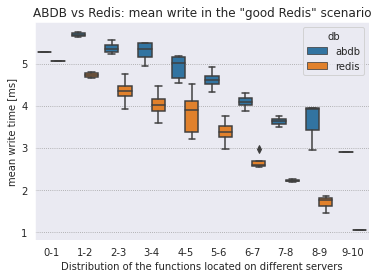

In [65]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.boxplot(x="dist", y="latency", data=df, hue="db")
ax.set_title('ABDB vs Redis: mean {} in the "{} Redis" scenario'.format(required_operation, required_scenario))
ax.set_ylabel('mean {} time [ms]'.format(required_operation))
ax.set_xlabel('Distribution of the functions located on different servers'.format(required_operation))

## READ vs WRITE

In [56]:
df = pd.DataFrame({})
for measurement in measurements_sorted:
    if measurement["scenario"] == required_scenario:
        if measurement["stdev"] < 1.0:
            distribution = "0-1"
        elif measurement["stdev"] < 2.0 and measurement["stdev"] >= 1.0:
            distribution = "1-2"
        elif measurement["stdev"] < 3.0 and measurement["stdev"] >= 2.0:
            distribution = "2-3"
        elif measurement["stdev"] < 4.0 and measurement["stdev"] >= 3.0:
            distribution = "3-4"
        elif measurement["stdev"] < 5.0 and measurement["stdev"] >= 4.0:
            distribution = "4-5"
        elif measurement["stdev"] < 6.0 and measurement["stdev"] >= 5.0:
            distribution = "5-6"
        elif measurement["stdev"] < 7.0 and measurement["stdev"] >= 6.0:
            distribution = "6-7"
        elif measurement["stdev"] < 8.0 and measurement["stdev"] >= 7.0:
            distribution = "7-8"
        elif measurement["stdev"] < 9.0 and measurement["stdev"] >= 8.0:
            distribution = "8-9"
        elif measurement["stdev"] < 10.0 and measurement["stdev"] >= 9.0:
            distribution = "9-10"
        else:
            asd = 0
            print("ERROR")
        
        df = df.append(
            {'dist': distribution, 'operation': required_operation, 'latency': measurement["abdb_read_mean"],
             'operation': "read"}, ignore_index=True)
        df = df.append(
            {'dist': distribution, 'operation': required_operation, 'latency': measurement["abdb_write_mean"],
             'operation': "write"}, ignore_index=True)    


df['latency'] = df['latency'].astype('float')

Text(0.5, 0, 'Distribution of the functions located on different servers')

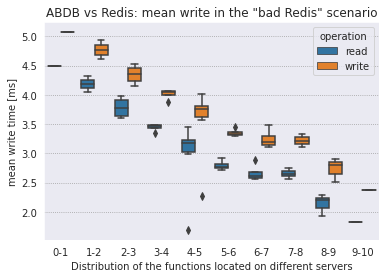

In [57]:
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
ax = sns.boxplot(x="dist", y="latency", data=df, hue="operation")
ax.set_title('ABDB vs Redis: mean {} in the "{} Redis" scenario'.format(required_operation, required_scenario))
ax.set_ylabel('mean {} time [ms]'.format(required_operation))
ax.set_xlabel('Distribution of the functions located on different servers'.format(required_operation))